## Inspiration and contributions

The following challenge was inspired by _Python Machine Learning: 1st Edition_ by _Sebastian Raschka_.

Contributions to coding challenge (alphabetically): Anna Laddach (Francis Crick Institute, London, UK), Marius Kausas (Francis Crick Institute & KCL, London, UK), Paul Smith (KCL, London, UK).

In [16]:
# Loading Python libraries

# Data manipulation libraries
import numpy as np
import pandas as pd

# Machine learning libraries

# Correlation
from scipy import stats

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# Data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Dimensionality reduction
from sklearn.decomposition import PCA

# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use("ggplot")
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 7

# Web libraries
import requests

## Hackathon tasks

### Interacting with Python libraries through API

Your task is try to grasp the internal structure of Python libraries, how to interact with an API and look-up useful methods for your research.

### Plotting

Basics of Matloptlib and Seaborn

1. Learn how to generate a basic plot.
2. Change default Matplotli or Seaborn plotting styles
3. Set basic plot attributes, such as labels, titles and colors.
4. Save figures as .png format with a certain quality.
5. Avoid typing plt.show() and set interactive plotting within IPython 
6. Change figure dimensions within Ipython.

### Data loading and visualisation

Your task is understand the nature of the dataset. Can you tell what will give you most predictive power?

1. Download and load Breast Cancer Wisconsin dataset.
2. Understand what type of data do you have.
3. Investigate dataset values by plotting histograms, scatter plots or contour plots.

### Correlations

Why would you investigate your data using correlation?

1. What types of correlation there are?
2. Using scipy, calculate two types of correlation between any given two features.
3. Calculate pair-wise correlations between dataset features and plot a heatmap using.

### Data encoding

Why would you want to encode your data labels?

### Data preparation

Why data preparation is important?

1. Why we need training and tests sets?
2. Using sklearn, split your data into training and test sets.
3. What are data scaling methods?

### Dimensionality reduction 

What data dimensionality reduction can tell about your data?

1. What is Principal Component analysis (PCA)?
2. Why would you want to use PCA analysis?
3. Using sklearn, how do you initialize a PCA model?
1. What proportion of your data accounts for the largest variance?
2. How scalling affects PCA variance?

### Two types of regression

Perform two types of regression, name Linear and Logistic.

1. What is a regression?
2. What are the differences between Linear and Logistic regression?
3. Using sklearn, how do you set-up a Random Forest model?
3. Why one of them might be better?

### Random Forests

Investigate the use of Random Trees/Forests for data classification.

1. What are Random Forests?
2. What are advantages and disadvantages of the method?
3. Using sklearn, how do you set-up a Random Forest model?
4. Which statistical measures you can use to investigate the performance of Random Forests?
5. How do you get feature importance from Random Forests?
6. Why would you use Grid Search withing Random Forests?

### Too easy?

Cross-compare the performance of available classification algorithms and tell which works the best!

## Breast Cancer Wisconsin data

### Introduction

We will be working with the Breast Cancer Wisconsin dataset, which contains 569 samples of __malignent__ and __benign__ tumor cells. The first two columns in the data set store unique ID numbers of the samples and the corresponding real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. 

For more informationa and data accession please follow to: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

### Data loading

Using pandas load the dataset and explore the values.

In [3]:
# Load the dataset using pandas

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/" \
        "breast-cancer-wisconsin/wdbc.data",
    header=None
)

In [8]:
# Separate diagnosis (malignant and benign) and feature columns

ids, diagnosis, *features = df.T.to_numpy()

# With *features a list is created. Convert to numpy array. 
features = np.asarray(features, dtype=np.float64).T

In [5]:
diagnosis

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [10]:
features.shape

(569, 30)

### Correlations within the data set

Use Pearson or Spearman correlation test to analyse the pair-wise correlation between features.

In [38]:
# Set the number of features
num_features = features.shape[1]

# Define a zero 2D numpy matrix of shape (number_of_features, number_of_features)
correl_mat = np.zeros((num_features, num_features))

# Calculate pair-wise correlations between each features
for i in range(num_features):
    for j in range(num_features):
        correl_mat[i,j] = stats.pearsonr(features[:,i:i+1], features[:, j:j+1])[0]

Text(0.5, 1.0, 'Pairwise Pearson correlations between dataset features')

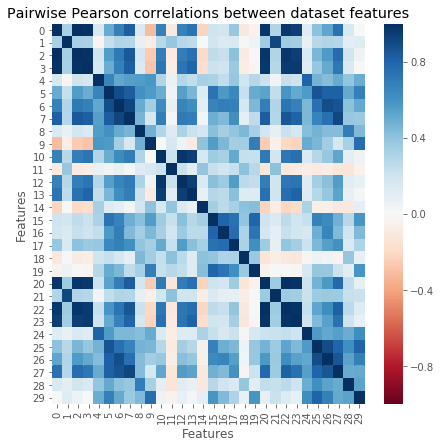

In [48]:
# Plot heatmaps of pair-wise correlations
sns.heatmap(correl_mat, vmin=-1, vmax=1, cmap="RdBu")
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Pairwise Pearson correlations between dataset features")

### Diagnosis label encoding

Encode diagnosis labels as 0 or 1 to be used for statistical modelling approaches.

In [6]:
# Transform diagnosis labels
# B -> 0, M -> 1
diagnosis = LabelEncoder().fit_transform(diagnosis)

In [7]:
diagnosis

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### Preparation of training and test datasets

Prepare training and test datasets using sklearn by controlling the ratio of splitting.

In [8]:
# Define the proportion between training and test datasets
proportion = 0.2

# Split the dataset (random_state for analysis reproducibility)
features_train, features_test, diagnosis_train, diagnosis_test = \
    train_test_split(features, diagnosis, test_size=proportion, random_state=1) 

In [9]:
# Original data size vs train vs test
features.shape, features_train.shape, features_test.shape

((569, 30), (455, 30), (114, 30))

In [10]:
features_train

array([[1.799e+01, 2.066e+01, 1.178e+02, ..., 1.974e-01, 3.060e-01,
        8.503e-02],
       [2.029e+01, 1.434e+01, 1.351e+02, ..., 1.625e-01, 2.364e-01,
        7.678e-02],
       [9.000e+00, 1.440e+01, 5.636e+01, ..., 1.389e-02, 2.991e-01,
        7.804e-02],
       ...,
       [1.720e+01, 2.452e+01, 1.142e+02, ..., 1.899e-01, 3.313e-01,
        1.339e-01],
       [1.403e+01, 2.125e+01, 8.979e+01, ..., 7.963e-02, 2.226e-01,
        7.617e-02],
       [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
        6.169e-02]])

In [11]:
features_test

array([[1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       [1.317e+01, 1.866e+01, 8.598e+01, ..., 2.088e-01, 3.900e-01,
        1.179e-01],
       [1.295e+01, 1.602e+01, 8.314e+01, ..., 1.056e-01, 3.380e-01,
        9.584e-02],
       ...,
       [9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [1.453e+01, 1.934e+01, 9.425e+01, ..., 9.594e-02, 2.471e-01,
        7.463e-02],
       [1.378e+01, 1.579e+01, 8.837e+01, ..., 3.312e-02, 1.859e-01,
        6.810e-02]])

In [12]:
diagnosis_train

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [13]:
diagnosis_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

### Comparison of statistical models to investigate the data

### Linear regression

In [14]:
# Initialise Linear Regression
linreg = LinearRegression()

# Fit linear regression model based on training data
linreg.fit(features_train, diagnosis_train)

# Predict labels based on test dataset
diagnosis_pred = linreg.predict(features_test)

# Get the results
# The mean squared error
print('Mean square error:', mean_squared_error(diagnosis_test, diagnosis_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:', r2_score(diagnosis_test, diagnosis_pred))

Mean square error: 0.06352676895179125
Variance score: 0.7269861477190875


### Logistic regression

In [15]:
# Initialise Logistic Regression
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)

# Fit logistic regression model based on training data
logreg.fit(features_train, diagnosis_train)

# Predict labels based on test dataset
diagnosis_pred = logreg.predict(features_test)

# Get the results
# The mean squared error
print('Mean square error:', mean_squared_error(diagnosis_test, diagnosis_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:', r2_score(diagnosis_test, diagnosis_pred))

# Get prediction results
# print("Accuracy:", accuracy_score(diagnosis_test, diagnosis_pred))
# print("Precision:", precision_score(diagnosis_test, diagnosis_pred))
# print("Recall:", recall_score(diagnosis_test, diagnosis_pred))

Mean square error: 0.05263157894736842
Variance score: 0.7738095238095237


### PCA analysis

Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique that helps to identify patterns in data based on correlations between features. Investigate the affect of data standardization on explain variance within the data using PCA.

### PCA without data scaling

In [16]:
# Initialise a PCA
pca_nonscaled = PCA()

# Run the PCA
pca_nonscaled_results = pca_nonscaled.fit_transform(features)

Text(0, 0.5, 'Variance')

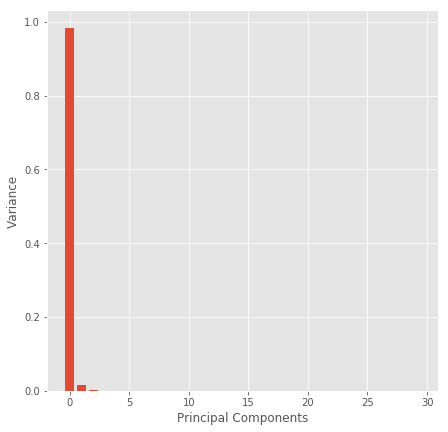

In [17]:
plt.bar(range(0,30), pca_nonscaled.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Variance")

Text(0, 0.5, 'PC2')

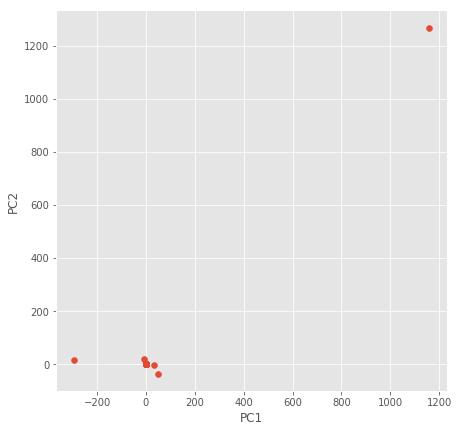

In [18]:
plt.scatter(pca_nonscaled_results[:1,:], pca_nonscaled_results[1:2,:])
plt.xlabel("PC1")
plt.ylabel("PC2")

### PCA with scalling

In [19]:
# Initialise a PCA
pca_scaled = PCA()

# Scale the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Run the PCA
pca_scaled_results = pca_scaled.fit_transform(features_scaled)

Text(0, 0.5, 'Variance')

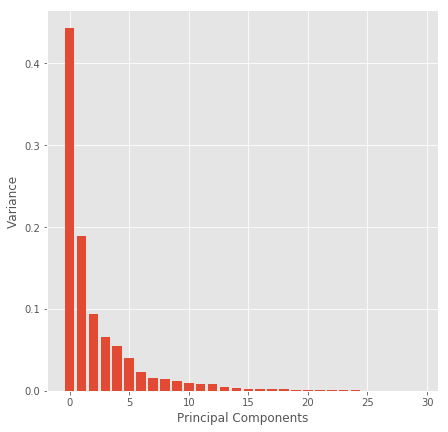

In [20]:
plt.bar(range(0,30), pca_scaled.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Variance")

In [21]:
pca_scaled_results[:1,:][0]

array([ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
        1.41142445,  2.15936987, -0.39840723, -0.15711836, -0.87740188,
        0.26295546, -0.85901448,  0.10338766, -0.6908041 , -0.60179313,
        0.74511579, -0.26547078, -0.54956269, -0.1337675 ,  0.3455649 ,
        0.09651489,  0.06884992,  0.08451859, -0.17525628, -0.15102006,
       -0.20150345, -0.25258499, -0.03391445,  0.04564772, -0.04716921])

Text(0, 0.5, 'PC2')

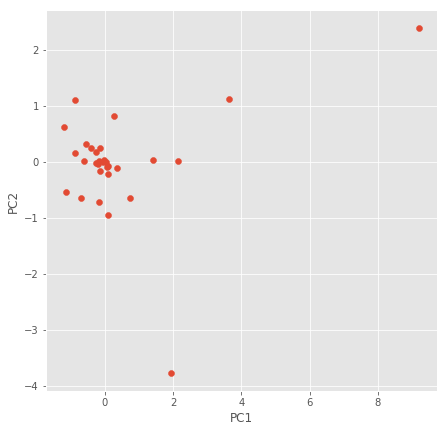

In [22]:
plt.scatter(pca_scaled_results[:1,:], pca_scaled_results[1:2,:])
plt.xlabel("PC1")
plt.ylabel("PC2")

### Pipeline setup

Instead of going through fitting and transformation steps for training and test dataset separately, we can chain StandarScaler, PCA and Logistic Regression objects into a pipeline.

In [23]:
# Initialize a pipeline containing a Logistic Regression model
pipe_lr = Pipeline([("scl", StandardScaler()),
                    ("pca", PCA(n_components=2)),
                    ("clf", LogisticRegression(solver='lbfgs', max_iter=5000))])

# Train the model using training dataset
pipe_lr.fit(features_train, diagnosis_train)

# See how well the model behaved
pipe_lr.score(features_test, diagnosis_test)

0.9473684210526315

### Random Forests

Use Random Forest to investigate your dataset. Intuitively, Random Forests can be considered as an ensemble of Decision Trees. A Decision Tree is a model where one breaks down our data of interest by making decision based on asking a series of questions. By running multiple Decision Trees one asign class labels by a majority vote.

In [24]:
# Split data for Random Forest
X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size=proportion, random_state=42) 

# Initialize a Random Forest
rf = RandomForestClassifier(random_state=42, oob_score = True, class_weight = "balanced")

# Train and predict with your Random Forest model
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [25]:
# Get metrics on model performance
print("Accuracy: ", accuracy_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test,y_pred))
print("ROC_AUC: ", roc_auc_score(y_test,y_pred))
print("MCC: ", matthews_corrcoef(y_test,y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("OOB score: ", rf.oob_score_)

Accuracy:  0.956140350877193
Precision:  0.975
Recall:  0.9069767441860465
F1_score:  0.9397590361445783
ROC_AUC:  0.9464461185718964
MCC:  0.9068106119605033
Confusion matrix:  [[70  1]
 [ 4 39]]
OOB score:  0.9582417582417583


In [26]:
# Get feature importances of random forest classifier
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 27 (0.171394)
2. feature 7 (0.127242)
3. feature 20 (0.105300)
4. feature 26 (0.088780)
5. feature 13 (0.080691)
6. feature 23 (0.080148)
7. feature 0 (0.066333)
8. feature 2 (0.058957)
9. feature 25 (0.033840)
10. feature 22 (0.031583)
11. feature 10 (0.016391)
12. feature 3 (0.014773)
13. feature 24 (0.014253)
14. feature 16 (0.013889)
15. feature 17 (0.013535)
16. feature 1 (0.012193)
17. feature 21 (0.010896)
18. feature 29 (0.008517)
19. feature 4 (0.007280)
20. feature 19 (0.006731)
21. feature 5 (0.005886)
22. feature 28 (0.005078)
23. feature 15 (0.004863)
24. feature 14 (0.004454)
25. feature 12 (0.004068)
26. feature 11 (0.003175)
27. feature 8 (0.002799)
28. feature 6 (0.002771)
29. feature 18 (0.002227)
30. feature 9 (0.001949)


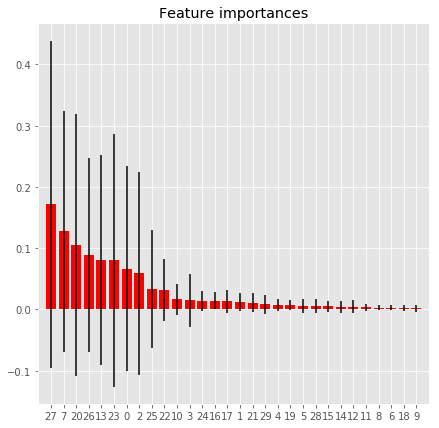

In [27]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

In [28]:
# Grid search for best parameters
rf = RandomForestClassifier(random_state=42, oob_score = True, class_weight = "balanced")

parameters = dict(n_estimators=[10, 50, 100, 200],\
              max_features=["sqrt","log2", None],\
              min_samples_leaf=[1,2,3,4,5])

grid = GridSearchCV(rf, param_grid = parameters, scoring='f1')
grid.fit(features, diagnosis)

#scores for all parameter combinations are available in grid.grid_scores_
best_estimator = grid.best_estimator_
print(grid.best_score_)
print(grid.best_params_)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9501941253926309
{'max_features': 'log2', 'n_estimators': 100, 'min_samples_leaf': 2}
